<a href="https://colab.research.google.com/github/Baisalis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/What's_the_most_popular_Halloween_candy%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My question is which is the most popular halloween candy and does it contain chocolate ? That means most of the people like chocklate candies.**

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
candy_data_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv'

In [275]:
Candy = pd.read_csv(candy_data_url)
Candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [276]:
Candy.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


In [277]:
Candy.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [278]:
Candy.shape

(85, 13)

In [279]:
Candy.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [280]:
Candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


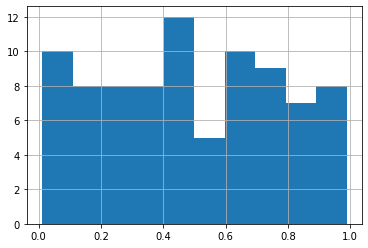

In [281]:
Candy['sugarpercent'].hist(bins=10);

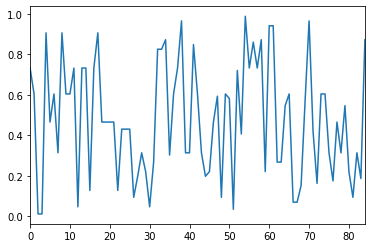

In [282]:
Candy['sugarpercent'].plot();

In [0]:
winners = Candy[Candy.winpercent>Candy.winpercent.quantile(.9)]

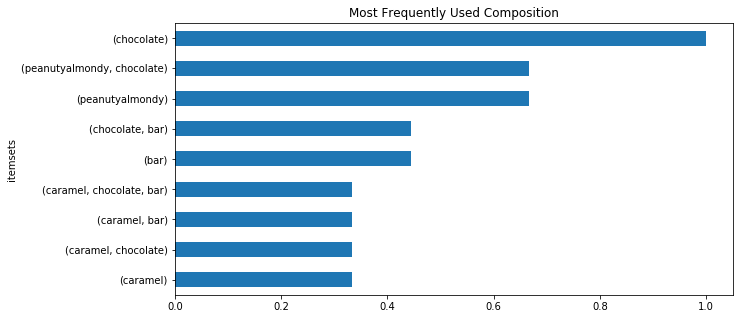

In [284]:
from mlxtend.frequent_patterns import apriori
df =  winners[Candy.columns[1:-3]]
association = apriori(df, min_support=0.3,use_colnames=True).sort_values(by='support')


association.plot(kind='barh',x='itemsets',y='support',title=f'Most Frequently Used Composition',sort_columns=True,figsize = (10,5),legend=False)

# Chocklate is used most frequently in almost all candy

In [285]:
popularity = Candy[['competitorname','winpercent']].sort_values(by='winpercent')
popularity


,competitorname,winpercent
44,Nik L Nip,22.445341
7,Boston Baked Beans,23.417824
12,Chiclets,24.524988
72,Super Bubble,27.303865
26,Jawbusters,28.127439
...,...,...
64,Snickers,76.673782
28,Kit Kat,76.768600
79,Twix,81.642914
51,ReeseÕs Miniatures,81.866257


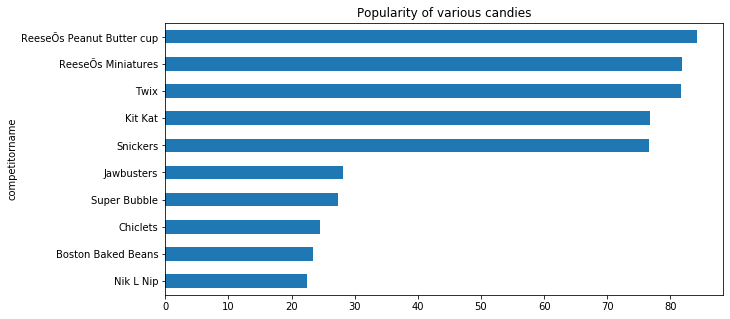

In [286]:
pd.concat([popularity.head(5),popularity.tail(5)],axis=0).plot(x='competitorname',y='winpercent',kind='barh',title='Popularity of various candies',sort_columns=True,figsize = (10,5),legend=False)

# Reeseos peanut butter cup is popular candy

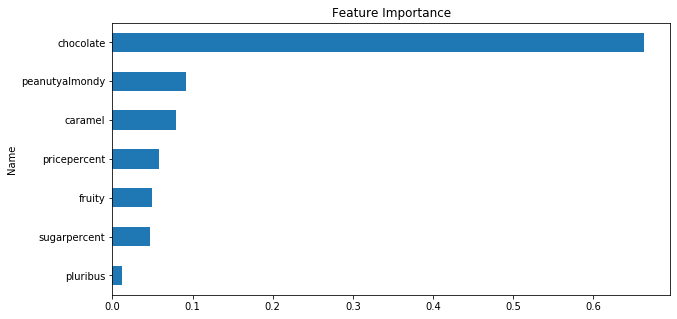

In [287]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=3).fit(Candy[Candy.columns[1:-1]],Candy[Candy.columns[-1]])
imp = pd.DataFrame.from_dict({'Name':Candy.columns[1:-1],'Importance':reg.feature_importances_})
imp_plt = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)
imp_plt[imp_plt.Importance>0].plot(kind='barh',x='Name',y='Importance',title='Feature Importance',sort_columns=True,figsize = (10,5),legend=False)

In [288]:
Candy[Candy['chocolate']==1].sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


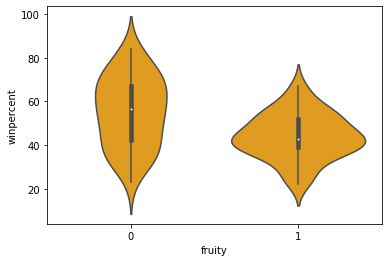

In [289]:
sns.violinplot(x="fruity", y="winpercent", data=Candy, color="orange", edgecolor="gray")

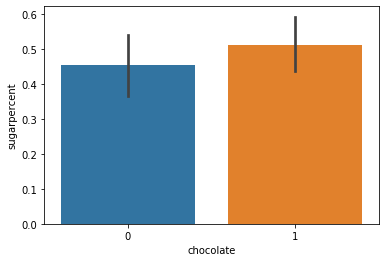

In [290]:
sns.barplot(x="chocolate", y="sugarpercent", data=Candy)

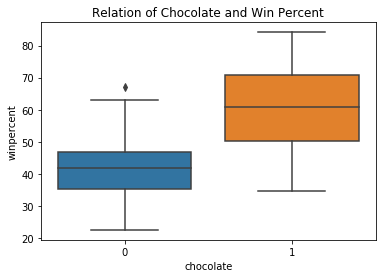

In [291]:
sns.boxplot(x="chocolate", y="winpercent", data=Candy).set_title('Relation of Chocolate and Win Percent');

In [292]:
Candy.sort_values(by=['sugarpercent', 'winpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.906,0.453,46.783348
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.872,0.325,46.411716


In [293]:
Candy['sugarbyprice'] = Candy['sugarpercent'].div(Candy['pricepercent']) # higher value means the candy is sweeter as well as cheaper
Candy['winbyprice'] = Candy['winpercent'].div(Candy['pricepercent']) # higher value means the candy is more liked as well as cheaper

Candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0.851163,77.874098
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1.181996,132.295379
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0.094828,278.112810
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0.021526,90.247567
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1.772994,102.429485


In [294]:
categorival_vars = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar',
                    'pluribus']
numerical_vars = ['sugarpercent', 'pricepercent', 'winpercent', 'sugarbyprice', 'winbyprice']

Candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0.851163,77.874098
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1.181996,132.295379
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0.094828,278.112810
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0.021526,90.247567
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1.772994,102.429485


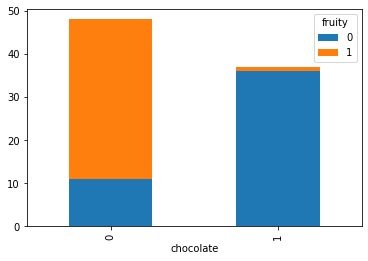

In [295]:
import pandas as pd
pd.crosstab(Candy['chocolate'],Candy['fruity']).plot(kind='bar', stacked='true');

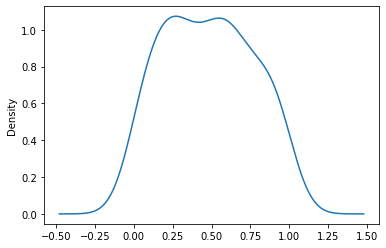

In [296]:
Candy['sugarpercent'].plot.density();

In [297]:
Candy[(Candy['chocolate']==1)&(Candy['fruity']==1)]

# which candy has chocklate and fruty both

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651,1.858462,150.715854


In [298]:
Candy[(Candy['chocolate']==1)&(Candy['caramel']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0.851163,77.874098
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,0.787484,74.204101
35,Milk Duds,1,0,1,0,0,0,0,0,1,0.302,0.511,55.064072,0.590998,107.757484
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556,0.927803,112.288101
37,Milky Way Midnight,1,0,1,0,1,0,0,1,0,0.732,0.441,60.800701,1.659864,137.870067
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340,1.122093,74.829464
56,Rolo,1,0,1,0,0,0,0,0,1,0.860,0.860,65.716286,1.000000,76.414285
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,0.838710,117.778463
65,Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,0.927803,91.442779
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,0.602649,90.113590


In [299]:
Candy[(Candy['chocolate']==1)&(Candy['bar']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0.851163,77.874098
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1.181996,132.295379
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,0.606258,65.642170
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,0.787484,74.204101
10,Charleston Chew,1,0,0,0,1,0,0,1,0,0.604,0.511,38.975037,1.181996,76.272091
23,HersheyÕs Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.284481,0.468410,67.848020
24,HersheyÕs Milk Chocolate,1,0,0,0,0,0,0,1,0,0.430,0.918,56.490501,0.468410,61.536495
25,HersheyÕs Special Dark,1,0,0,0,0,0,0,1,0,0.430,0.918,59.236122,0.468410,64.527367
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600,0.612524,150.232100
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556,0.927803,112.288101


In [300]:
Candy[(Candy['chocolate']==1)&(Candy['caramel']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0.851163,77.874098
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,0.787484,74.204101
35,Milk Duds,1,0,1,0,0,0,0,0,1,0.302,0.511,55.064072,0.590998,107.757484
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556,0.927803,112.288101
37,Milky Way Midnight,1,0,1,0,1,0,0,1,0,0.732,0.441,60.800701,1.659864,137.870067
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340,1.122093,74.829464
56,Rolo,1,0,1,0,0,0,0,0,1,0.860,0.860,65.716286,1.000000,76.414285
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,0.838710,117.778463
65,Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,0.927803,91.442779
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,0.602649,90.113590


In [301]:
Candy[(Candy['chocolate']==1)&(Candy['peanutyalmondy']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,0.606258,65.642170
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,0.787484,74.204101
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050,1.267281,109.777339
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451,0.340959,59.397007
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641,0.787484,92.223780
47,Peanut M&Ms,1,0,0,1,0,0,0,0,1,0.593,0.651,69.483788,0.910906,106.733926
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,0.121864,293.427434
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,1.105991,129.309197
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990,0.623656,112.803361
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,1.517665,111.962978


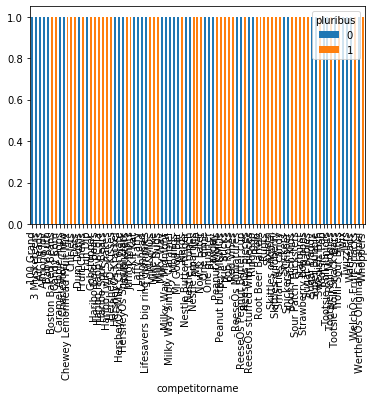

In [302]:
import pandas as pd
pd.crosstab(Candy['competitorname'],Candy['pluribus']).plot(kind='bar', stacked='true')

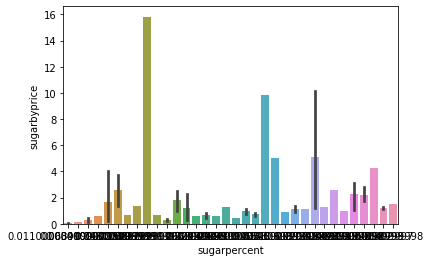

In [303]:
sns.barplot(x='sugarpercent', y='sugarbyprice', data=Candy)

In [304]:
Candy.sort_values(by=['winbyprice', 'winpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748,15.818181,4157.886182
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,37.722336,4.043478,1640.101565
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924,3.735294,1267.321220
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556,21.529410,1160.604520
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,34.578991,9.810345,596.189521
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454,1.365591,595.434976
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,0.594828,516.068948
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,0.594828,455.396095
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691,10.608696,430.488288
59,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,34.722000,2.716049,428.666667


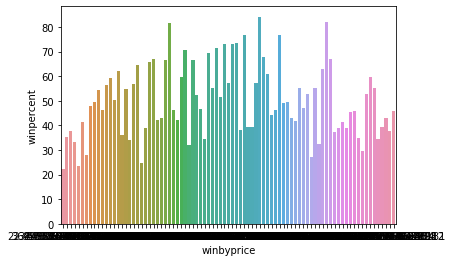

In [305]:
sns.barplot(x='winbyprice', y='winpercent', data=Candy)

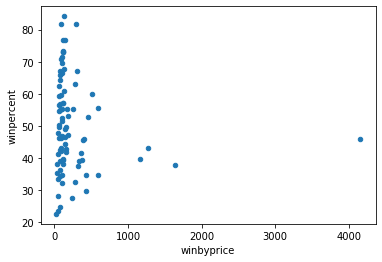

In [306]:
Candy.plot.scatter('winbyprice', 'winpercent')

In [307]:
Candy.sort_values(by=['sugarbyprice', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556,21.529410,1160.604520
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748,15.818181,4157.886182
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691,10.608696,430.488288
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,34.578991,9.810345,596.189521
50,Red vines,0,1,0,0,0,0,0,0,1,0.581,0.116,37.348522,5.008620,321.970017
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,4.277273,286.750636
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695,4.277273,250.471341
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,37.722336,4.043478,1640.101565
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924,3.735294,1267.321220
58,Runts,0,1,0,0,0,0,1,0,1,0.872,0.279,42.849144,3.125448,153.581156


In [308]:
Candy.sort_values(by=['sugarbyprice', 'pricepercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556,21.529410,1160.604520
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748,15.818181,4157.886182
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691,10.608696,430.488288
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,34.578991,9.810345,596.189521
50,Red vines,0,1,0,0,0,0,0,0,1,0.581,0.116,37.348522,5.008620,321.970017
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,4.277273,286.750636
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695,4.277273,250.471341
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,37.722336,4.043478,1640.101565
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924,3.735294,1267.321220
58,Runts,0,1,0,0,0,0,1,0,1,0.872,0.279,42.849144,3.125448,153.581156


In [309]:
Candy.sort_values(by=['sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,1.517665,111.962978
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550,1.258149,43.595240
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340,1.122093,74.829464
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695,4.277273,250.471341
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,4.277273,286.750636
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.906,0.453,46.783348,2.000000,103.274497
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1.772994,102.429485
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,2.787692,116.956813
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.872,0.325,46.411716,2.683077,142.805284
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113,1.028302,58.401077


In [310]:
Candy.sort_values(by=['sugarbyprice'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556,21.529410,1160.604520
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748,15.818181,4157.886182
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691,10.608696,430.488288
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,34.578991,9.810345,596.189521
50,Red vines,0,1,0,0,0,0,0,0,1,0.581,0.116,37.348522,5.008620,321.970017
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695,4.277273,250.471341
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,4.277273,286.750636
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,37.722336,4.043478,1640.101565
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924,3.735294,1267.321220
58,Runts,0,1,0,0,0,0,1,0,1,0.872,0.279,42.849144,3.125448,153.581156


In [311]:
Candy.sort_values(by=['sugarpercent', 'winpercent'], ascending=False).head(10)

# top 10 sugar candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,1.517665,111.962978
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340,1.122093,74.829464
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550,1.258149,43.595240
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,4.277273,286.750636
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695,4.277273,250.471341
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1.772994,102.429485
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.906,0.453,46.783348,2.000000,103.274497
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,2.787692,116.956813
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113,1.028302,58.401077
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.872,0.325,46.411716,2.683077,142.805284


In [312]:
 Candy[Candy['chocolate']==0].sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

 # not chocolaty but winner

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
68,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,0.686364,304.716491
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,4.277273,286.750636
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,0.594828,516.068948
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,57.119740,1.000000,122.838151
41,Nerds,0,1,0,0,0,0,1,0,1,0.848,0.325,55.354046,2.609231,170.320147
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695,4.277273,250.471341
73,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604,0.755,54.861111,0.800000,72.663723
31,Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.267,0.279,52.911392,0.956989,189.646560
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,0.594828,455.396095
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1.772994,102.429485


In [313]:
 Candy[Candy['chocolate']==1].sort_values(by=['sugarpercent'], ascending=True).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,0.121864,293.427434
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454,1.365591,595.434976
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748,15.818181,4157.886182
27,Junior Mints,1,0,0,0,0,0,0,0,1,0.197,0.511,57.219250,0.385519,111.975053
59,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,34.722000,2.716049,428.666667
62,Nestle Smarties,1,0,0,0,0,0,0,0,1,0.267,0.976,37.887188,0.273566,38.818840
35,Milk Duds,1,0,1,0,0,0,0,0,1,0.302,0.511,55.064072,0.590998,107.757484
43,Nestle Crunch,1,0,0,0,0,1,0,1,0,0.313,0.767,66.470680,0.408083,86.663205
39,Mounds,1,0,0,0,0,0,0,1,0,0.313,0.860,47.829754,0.363953,55.615992
75,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313,0.511,43.068897,0.612524,84.283559


In [314]:
Candy[Candy['chocolate']==1].sort_values(by=['sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,1.517665,111.962978
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340,1.122093,74.829464
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113,1.028302,58.401077
56,Rolo,1,0,1,0,0,0,0,0,1,0.860,0.860,65.716286,1.000000,76.414285
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050,1.267281,109.777339
33,M&MÕs,1,0,0,0,0,0,0,0,1,0.825,0.651,66.574585,1.267281,102.265104
37,Milky Way Midnight,1,0,1,0,1,0,0,1,0,0.732,0.441,60.800701,1.659864,137.870067
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0.851163,77.874098
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,1.105991,129.309197
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651,1.858462,150.715854


In [315]:
Candy[Candy['chocolate']==1].sort_values(by=['sugarpercent', 'winpercent'], ascending=True).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,0.121864,293.427434
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454,1.365591,595.434976
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748,15.818181,4157.886182
27,Junior Mints,1,0,0,0,0,0,0,0,1,0.197,0.511,57.219250,0.385519,111.975053
59,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,34.722000,2.716049,428.666667
62,Nestle Smarties,1,0,0,0,0,0,0,0,1,0.267,0.976,37.887188,0.273566,38.818840
35,Milk Duds,1,0,1,0,0,0,0,0,1,0.302,0.511,55.064072,0.590998,107.757484
75,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313,0.511,43.068897,0.612524,84.283559
39,Mounds,1,0,0,0,0,0,0,1,0,0.313,0.860,47.829754,0.363953,55.615992
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451,0.340959,59.397007


In [316]:
Candy.sort_values(by=['winbyprice', 'winpercent'], ascending=False).head(10)

# top winbyprice competitorname

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748,15.818181,4157.886182
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,37.722336,4.043478,1640.101565
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924,3.735294,1267.321220
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556,21.529410,1160.604520
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,34.578991,9.810345,596.189521
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454,1.365591,595.434976
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,0.594828,516.068948
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,0.594828,455.396095
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691,10.608696,430.488288
59,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,34.722000,2.716049,428.666667


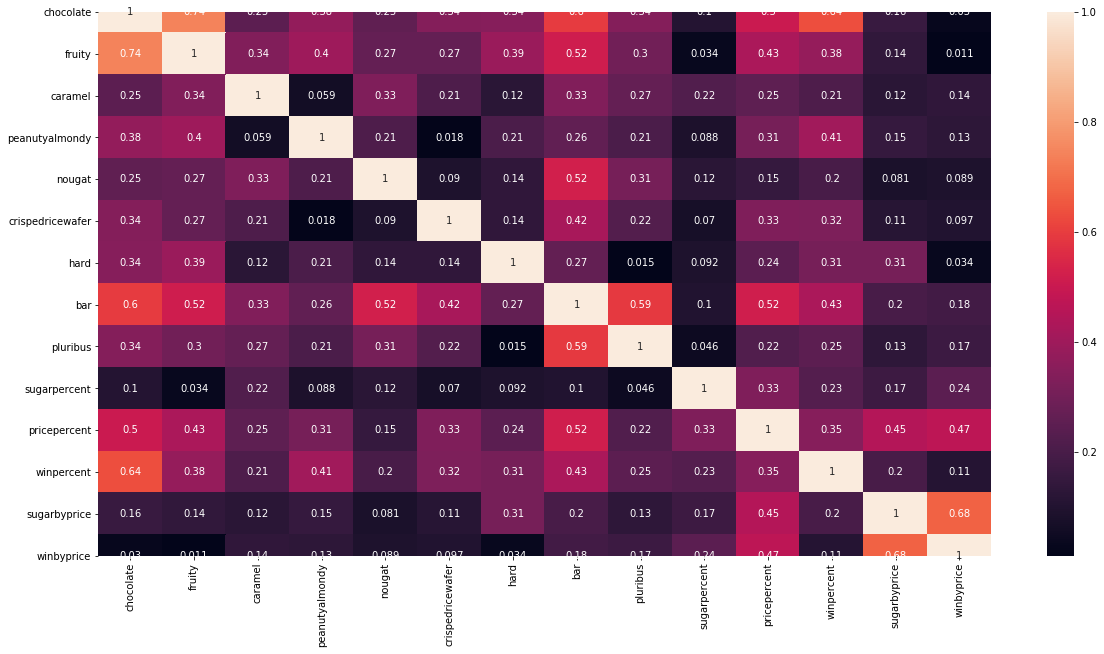

In [317]:
plt.figure(figsize=(20,10))
sns.heatmap(Candy.corr().abs(),annot=True)